In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Libraries
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

In [3]:
train = pd.read_csv("train.csv", index_col = 0)
test = pd.read_csv("test.csv", index_col = 0)

# A Glimpse of the datasets

In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Null value included in this dataset.

For "Age", roughly 20% of the data is missing.

For "Cabin", roughly 75% of the data is missing.

Later on we will need to decide what to do with the missing data.

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


Again, there are missing datas in the test dataset.

## Data Visualization

D:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\Users\user\Anaconda3\lib\site-pa

<Figure size 1152x864 with 0 Axes>

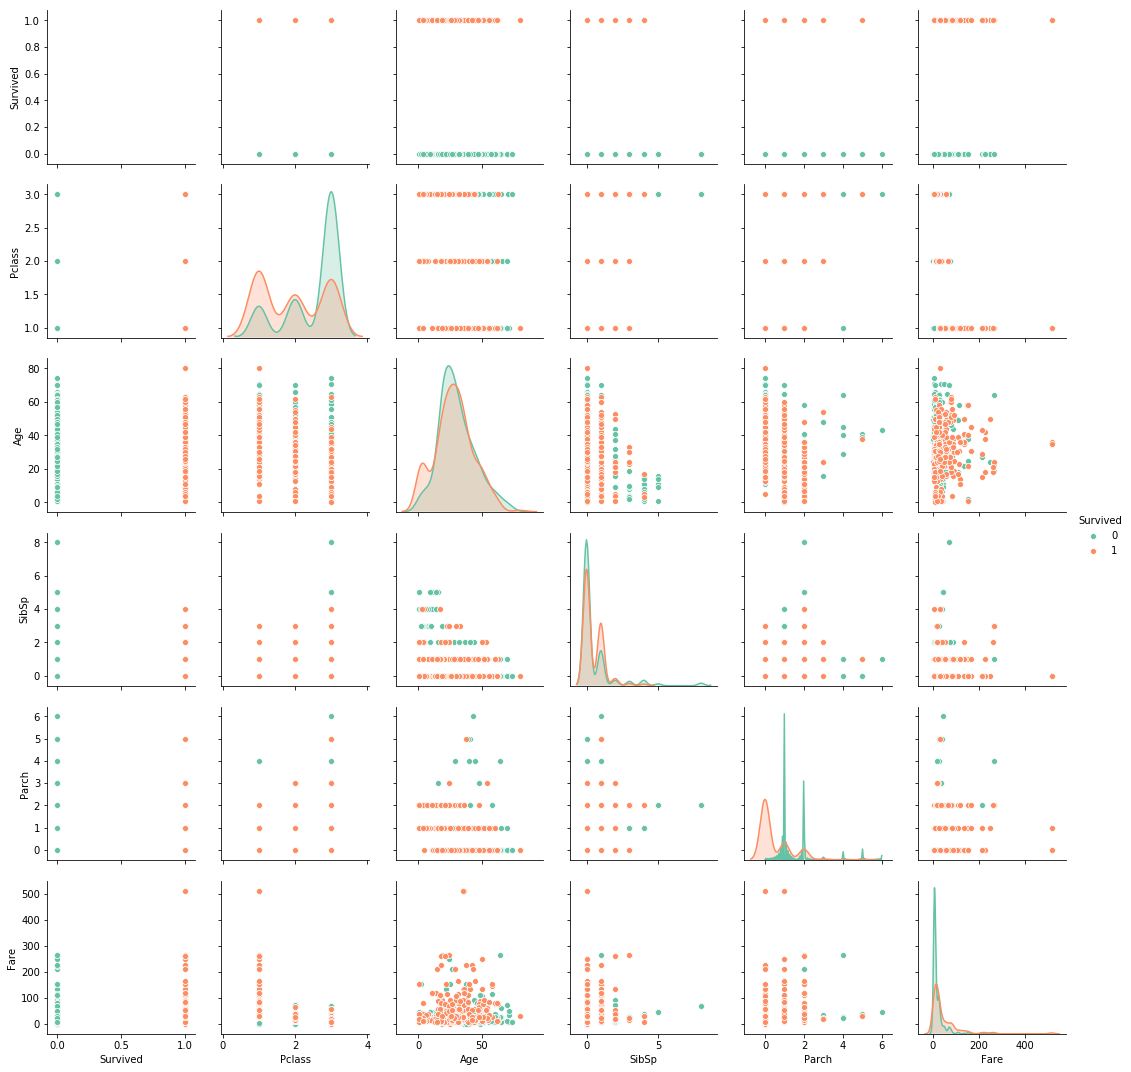

In [7]:
plt.figure(figsize=(16,12))
sns.pairplot(data = train, hue = 'Survived', palette = 'Set2')

From the plot above, we get some precious information.

1. From "Pclass vs. Pclass" block, Pclass = 3 tends to have a lower survival rate compared to Pclass = 1.

2. From "Age vs. Age" block, age <= 10 tends to have a higher survival rate, while adults tend to have a lower rate.

3. From "Parch vs. SibSp" block, we can find out bigger family size tends to have lower survival rate. Meanwhile, there are one big family (outlier).

4. From "Fare" column, there are some outleirs with high fare, and with some reasons or purely luck they survive.

5. From "Age vs. SibSp" block, lower are has more SibSp.

# Data Preprocessing for the missing data

In [8]:
# Let's have a clearer look about missing data
Total_missing_data_train = train.isnull().sum().sort_values(ascending=False)
Percent = round(Total_missing_data_train / len(train) * 100,2)
pd.concat([Total_missing_data_train ,Percent],axis=1,keys=['Total Missing Data','Percent'])

,Total Missing Data,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [9]:
# Let's have a clearer look about missing data
Total_missing_data_test = test.isnull().sum().sort_values(ascending=False)
Percent = round(Total_missing_data_test / len(test) * 100,2)
pd.concat([Total_missing_data_test,Percent],axis=1,keys=['Total Missing Data','Percent'])

,Total Missing Data,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


So in "Cabin", "Age", "Fare", and "Embark" there are missing values.

Let's start by the one with the fewest missing data.

## Missing data of "Fare"

In [10]:
# First let's deal with missing data of "Fare"
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Among all the features, in reality what is correlated with fare?

Intuitively it might be related to 

"Pclass" : the class of the seat

"Embarked" : Where they take on the boat

In [11]:
test[(test['Embarked'] == 'S') & (test['Pclass'] == 3)] # Extract passengers with the same features

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S
902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
910,3,"Ilmakangas, Miss. Ida Livija",female,27.00,1,0,STON/O2. 3101270,7.9250,NaN,S
913,3,"Olsen, Master. Artur Karl",male,9.00,0,1,C 17368,3.1708,NaN,S
917,3,"Robins, Mr. Alexander A",male,50.00,1,0,A/5. 3337,14.5000,NaN,S


In [12]:
missing_fare = test[(test['Embarked'] == 'S') & (test['Pclass'] == 3)]['Fare'].mean()
test['Fare'].fillna(missing_fare, inplace=True)

In [13]:
test[test['Name'] == 'Storey, Mr. Thomas']
# Now the missing Fare has been fixed!

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,13.91303,NaN,S


## Missing data of "Embarked"

In [14]:
# First let's find out where the missing values are.
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Let's take a look into the two rows.

Surprisingly, they have the feature in "Pclass", "Ticket", "Cabin", and "Fare"

How can I predict where they embark?

From personal experience, I assume that both "Fare" and "Pclass" are important variables.

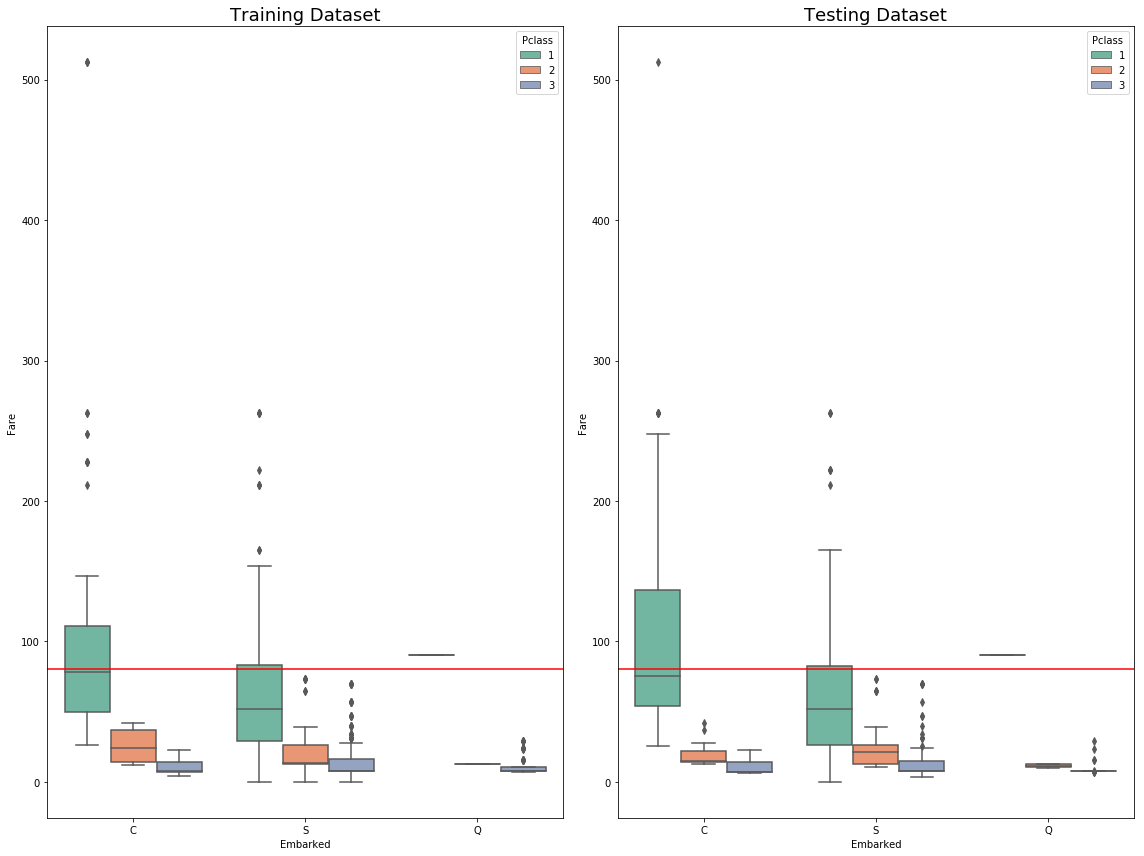

In [15]:
# Let's plot out the distribution to find out more detail!

fig, ax = plt.subplots(figsize=(16,12), ncols=2)
ax1 = sns.boxplot(data = train, x = 'Embarked', y = 'Fare', hue = 'Pclass', 
                  ax = ax[0], palette = 'Set2', order = ['C', 'S', 'Q'])
ax2 = sns.boxplot(data = test, x = 'Embarked', y ='Fare', hue = 'Pclass',
                  ax = ax[1], palette = 'Set2', order = ['C', 'S', 'Q'])
ax1.axhline(80, 0, 1, color='r')
ax2.axhline(80, 0, 1, color='r')
ax1.set_title('Training Dataset', fontsize = 18)
ax2.set_title('Testing Dataset', fontsize = 18)
plt.tight_layout()

Given Pclass = 1 and Fare = 80, from the boxplot above we can find critical information.

It is extremely likely that these two passengers fall embark at 'C'.

Though we can not prove it, let's assume it is the case, and assign 'C' to the two missing values.

In [16]:
train['Embarked'].fillna('C', inplace=True)

## Missing Value of "Age"

How can we come up with a way to find out possible age values?

Since there are ~20% of missing ages, we have to find a way to deal with it.

However, by intuition age seems to be an important indicator for survival rate.

Simply fill in mean, median, or mode value is too reckless.

In my opinion, I think it would be great if we can use regression model.

Hence, let's stop it right here.

## Missing Value of "Cabin"

In [17]:
print('Training Dataset')
print(train['Cabin'].isnull().value_counts())
print("*********************")
print('Testing Dataset')
print(test['Cabin'].isnull().value_counts())

Training Dataset
True     687
False    204
Name: Cabin, dtype: int64
*********************
Testing Dataset
True     327
False     91
Name: Cabin, dtype: int64


You can see the percetange of missing value "Cabin" is very high. Almost about 80%

It is not much value for this high missing rate.

As a result, I will just drop the column.

In [18]:
train.drop(columns = ["Cabin"], axis = 1, inplace = True)
test.drop(columns = ['Cabin'], axis = 1, inplace = True)

# has_cabin_value may be another choice.

In [19]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


I have done the process to cleaning missing data.

Now let's take a quick view about until now what kind of information we have.

In [20]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


"Survived" is what we are going to predict.

Later on for feature engineering, there are several features worth a look.

1. For "Name", will social status be related to the possibility of death? 
In my opinion I would say YES because people with higher social status tend to have more money to pick a safer seats(like higher class seats).
This is an issue worth a look later.

2. For "Sex", will sex be an important factor? In my opinion YES as well.
We will create dummy variable for later analysis.

3. For "Age", there are lots of null values still untackled.
We will later use regression models to input missing values.

3. For "SibSp" and "Parch", these info all related to the same idea, family size.
Will family size be an issue for determining survival rate? In my opinion, YES.
For instance, a mother may tend to their child more than herself when there's a disaster.

4. For "Ticket", this variable seems useless since it's composed of random characters and numbers.
Meanwhile, in reality what can we get from a ticket? Generally we will have seats, prices, passengers info, etc.
These infomation are all stated in the dataset already.
Hense, later on we will neglect this column.

5. For "Embarked", similar to the issue of sex, these values needs to be turned into dummy variables for later analysis.

# Feature Engineering

## Feature Name

In [21]:
train['Name'][1]

'Braund, Mr. Owen Harris'

We want to extract the "Title" for social status.

Let's see what we can get from it.

In [22]:
train['Title'] = [i.split(',')[1] for i in train['Name']]
train['Title'] = [i.split('.')[0] for i in train['Title']]

test['Title'] = [i.split(',')[1] for i in test['Name']]
test['Title'] = [i.split('.')[0] for i in test['Title']]

In [23]:
train['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Capt              1
 Ms                1
 Sir               1
 Jonkheer          1
 Mme               1
 Lady              1
 the Countess      1
 Don               1
Name: Title, dtype: int64

Since there are some abnormal titles, let's classify those weird ones into more common ones.
For ones what cannot be classified, or might have higher status, let's put it in "Rare"

In [24]:
train['Title'] = [i.replace('Rev','Rare') for i in train['Title']]
train['Title'] = [i.replace('Major','Rare') for i in train['Title']]
train['Title'] = [i.replace('Mlle','Miss') for i in train['Title']]
train['Title'] = [i.replace('Col','Rare') for i in train['Title']]
train['Title'] = [i.replace('Don','Rare') for i in train['Title']]
train['Title'] = [i.replace('Ms','Miss') for i in train['Title']]
train['Title'] = [i.replace('Capt','Rare') for i in train['Title']]
train['Title'] = [i.replace('Lady','Mrs') for i in train['Title']]
train['Title'] = [i.replace('Jonkheer','Rare') for i in train['Title']]
train['Title'] = [i.replace('the Countess','Rare') for i in train['Title']]
train['Title'] = [i.replace('Mme','Mrs') for i in train['Title']]
train['Title'] = [i.replace('Sir','Mr') for i in train['Title']]

In [25]:
train['Title'].value_counts()

 Mr        518
 Miss      185
 Mrs       127
 Master     40
 Rare       14
 Dr          7
Name: Title, dtype: int64

Again, for test dataset let's go the same replacement

In [26]:
test['Title'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Rev         2
 Col         2
 Ms          1
 Dona        1
 Dr          1
Name: Title, dtype: int64

In [27]:
test['Title'] = [i.replace('Rev','Rare') for i in test['Title']]
test['Title'] = [i.replace('Col','Rare') for i in test['Title']]
test['Title'] = [i.replace('Ms','Miss') for i in test['Title']]
test['Title'] = [i.replace('Dona','Rare') for i in test['Title']]

In [28]:
test['Title'].value_counts()

 Mr        240
 Miss       79
 Mrs        72
 Master     21
 Rare        5
 Dr          1
Name: Title, dtype: int64

Now we extract important features in Name, simply drop the "Name" column would be helpful.

In [29]:
train.drop(columns = ['Name'], inplace = True)
test.drop(columns = ['Name'], inplace = True)

In [30]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
5,0,3,male,35.0,0,0,373450,8.0500,S,Mr


## Feature Sex & Embarked

In [31]:
# First take a look into the dataset to see whether there are rare values.
print(train['Sex'].value_counts())
print('**************')
print(test['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
**************
male      266
female    152
Name: Sex, dtype: int64


In [32]:
print(train['Embarked'].value_counts())
print('***************')
print(test['Embarked'].value_counts())

S    644
C    170
Q     77
Name: Embarked, dtype: int64
***************
S    270
C    102
Q     46
Name: Embarked, dtype: int64


Everything looks fine now. Let's create the dummy variable for feature sex, embarked, title, and pclass.

In [33]:
train = pd.get_dummies(train, columns = ['Sex','Embarked','Title','Pclass'], drop_first = True)
test = pd.get_dummies(test, columns = ['Sex','Embarked','Title','Pclass'], drop_first = True)

In [34]:
train.head()

,Survived,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rare,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,22.0,1,0,A/5 21171,7.2500,1,0,1,0,0,1,0,0,0,1
2,1,38.0,1,0,PC 17599,71.2833,0,0,0,0,0,0,1,0,0,0
3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1,0,0,0,0,1
4,1,35.0,1,0,113803,53.1000,0,0,1,0,0,0,1,0,0,0
5,0,35.0,0,0,373450,8.0500,1,0,1,0,0,1,0,0,0,1


## Feature Ticket

In [35]:
# As I have mentioned, column ticket is not necessary for the analysis.
# I will simply drop the column out.
train.drop(columns = ['Ticket'], inplace = True)
test.drop(columns = ['Ticket'], inplace = True)

In [36]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rare,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,1,0,1,0,0,1,0,0,0,1
2,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0,1
4,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0,0
5,0,35.0,0,0,8.0500,1,0,1,0,0,1,0,0,0,1


## Feature Family Size

This is an important feature.

Intuitively, the composition of a family as well as the family size will all affect the rate of survival.

How can we find out the relationship?

First I want to do some plotting to unearth more relevant ideas.

In [37]:
# fig, ax = plt.subplots(figsize = (12,8), ncols = 2, nrows = 1)
# sns.countplot(data = train, x = 'SibSp', ax = ax[0], hue = 'Survived', palette = 'Set2')
# sns.countplot(data = train, x = 'Parch', ax = ax[1], hue = 'Survived', palette = 'Set2')
# plt.legend(loc=0)

In [38]:
full_data = [train, test]
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [39]:
FamilySize = train['FamilySize'].value_counts()
Percent = round(FamilySize / len(train) * 100,2)
pd.concat([FamilySize ,Percent],axis=1,keys=['Family Size','Percent'])

,Family Size,Percent
1,537,60.27
2,161,18.07
3,102,11.45
4,29,3.25
6,22,2.47
5,15,1.68
7,12,1.35
11,7,0.79
8,6,0.67


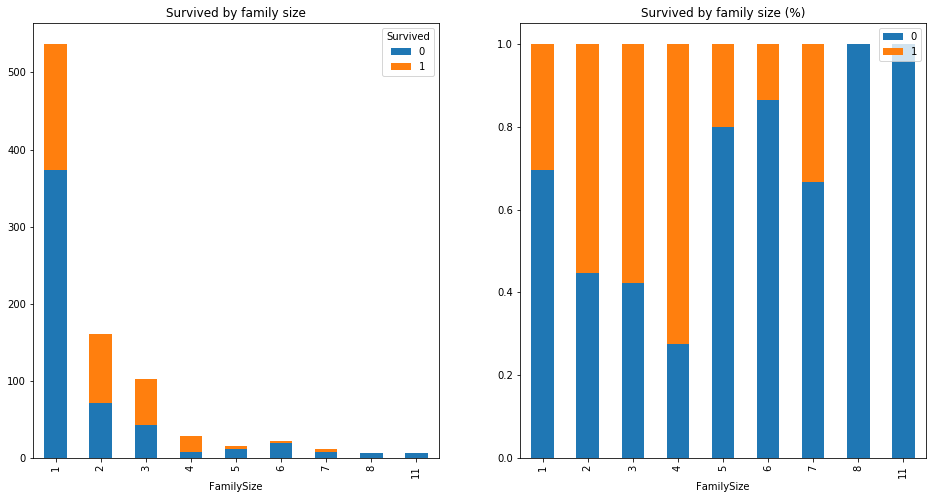

In [40]:
fig, ax = plt.subplots(figsize = (16,8), ncols = 2, nrows = 1)
pd.crosstab(train['FamilySize'], train['Survived']).plot(kind='bar', stacked=True, title="Survived by family size", ax = ax[0])
pd.crosstab(train['FamilySize'], train['Survived'], normalize='index').plot(kind='bar', stacked=True, title="Survived by family size (%)", ax = ax[1])
plt.legend(loc = 0)

From the chart above we can unearth several interesting elements.

1. Most Passengers are single passenger. (~60%)
2. Families with larger FamilySize has higher death rate (when FamilySize > 4)

In [41]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rare,Pclass_2,Pclass_3,FamilySize
PassengerId,,,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,1,0,1,0,0,1,0,0,0,1,2
2,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,2
3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0,1,1
4,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0,0,2
5,0,35.0,0,0,8.0500,1,0,1,0,0,1,0,0,0,1,1


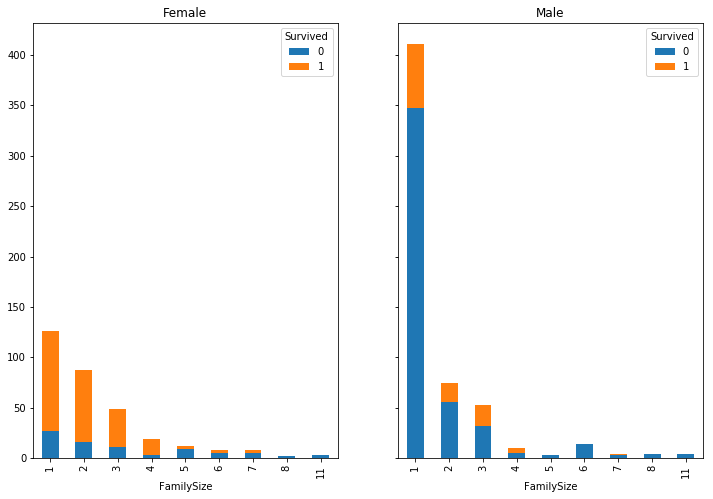

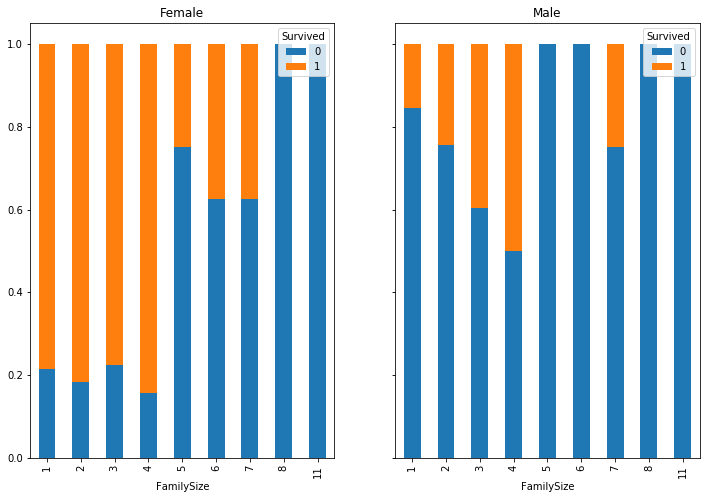

In [42]:
female = train[train['Sex_male'] == 0]
male = train[train['Sex_male'] == 1]

# Total number
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey=True, figsize=(12,8))
fig.set_figwidth(12)
pd.crosstab(female['FamilySize'], female['Survived']).plot(kind='bar', stacked=True, title="Female", ax=ax[0])
pd.crosstab(male['FamilySize'], male['Survived']).plot(kind='bar', stacked=True, title="Male", ax=ax[1])

# Percentage
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize=(12,8))
fig.set_figwidth(12)
pd.crosstab(female['FamilySize'], female['Survived'], normalize = 'index').plot(kind='bar', stacked=True, title="Female", ax=ax[0])
pd.crosstab(male['FamilySize'], male['Survived'], normalize = 'index').plot(kind='bar', stacked=True, title="Male", ax=ax[1])

Interesting information are as follows.

1. For both sex, FamilySize > 4 all lead to high death rates.

2. For female passenger with FamilySize > 4, the survival rate is higher compared to male passenger.

Therefore, let's divide the three categorical value.

1. FamilySize = 1 (Passenger Alone).

  Let's name it "One Passenger".
2. 2 <= FamilySize <= 4 (Small FamilySize)

  Let's name it "Small FamilySize".
3. FamilySize >= 5 (Large FamilySize)

  Let's name it "Large FamilySize".

In [43]:
train['FamilySize'].replace(1,'Passenger Alone',inplace=True)
train['FamilySize'].replace((2,3,4),'Small FamilySize',inplace=True)
train['FamilySize'].replace((5,6,7,8,11),'Large FamilySize',inplace=True)

In [44]:
test['FamilySize'].replace(1,'Passenger Alone',inplace=True)
test['FamilySize'].replace((2,3,4),'Small FamilySize',inplace=True)
test['FamilySize'].replace((5,6,7,8,11),'Large FamilySize',inplace=True)

In [45]:
# Get dummy variables for FamilySize
train = pd.get_dummies(train, columns = ['FamilySize'], drop_first = True)
test = pd.get_dummies(test, columns = ['FamilySize'], drop_first = True)

In [46]:
# Drop SibSp & Parch
train.drop(columns = ['SibSp','Parch'], axis = 1, inplace = True)
test.drop(columns = ['SibSp','Parch'], axis = 1, inplace = True)

In [47]:
train.head()

,Survived,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rare,Pclass_2,Pclass_3,FamilySize_Passenger Alone,FamilySize_Small FamilySize
PassengerId,,,,,,,,,,,,,,,
1,0,22.0,7.2500,1,0,1,0,0,1,0,0,0,1,0,1
2,1,38.0,71.2833,0,0,0,0,0,0,1,0,0,0,0,1
3,1,26.0,7.9250,0,0,1,0,1,0,0,0,0,1,1,0
4,1,35.0,53.1000,0,0,1,0,0,0,1,0,0,0,0,1
5,0,35.0,8.0500,1,0,1,0,0,1,0,0,0,1,1,0


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 15 columns):
Survived                       891 non-null int64
Age                            714 non-null float64
Fare                           891 non-null float64
Sex_male                       891 non-null uint8
Embarked_Q                     891 non-null uint8
Embarked_S                     891 non-null uint8
Title_ Master                  891 non-null uint8
Title_ Miss                    891 non-null uint8
Title_ Mr                      891 non-null uint8
Title_ Mrs                     891 non-null uint8
Title_ Rare                    891 non-null uint8
Pclass_2                       891 non-null uint8
Pclass_3                       891 non-null uint8
FamilySize_Passenger Alone     891 non-null uint8
FamilySize_Small FamilySize    891 non-null uint8
dtypes: float64(2), int64(1), uint8(12)
memory usage: 78.3 KB


The only features needed to be preprocessed is "Age" and "Fare".

For feature "Age", we still need to do the regression model for inputing the data. 

We will preprecess "Age" lastly.

For feature "Fare", it would be better if we can cut into fare bins.

Let's simply say we cut it into 5 groups, each representing 20% of the range of fare price. 

In [49]:
train['Fare_Group'] = pd.qcut(train['Fare'], 5, duplicates = 'drop')
test['Fare_Group'] = pd.qcut(test['Fare'], 5, duplicates = 'drop')
train.drop(columns = ['Fare'], inplace = True)
test.drop(columns = ['Fare'], inplace = True)

In [50]:
# Create dummy variables for Fare_Group
train = pd.get_dummies(train, columns = ['Fare_Group'], drop_first = True)
test = pd.get_dummies(test, columns = ['Fare_Group'], drop_first = True)

In [51]:
train.head()

,Survived,Age,Sex_male,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rare,Pclass_2,Pclass_3,FamilySize_Passenger Alone,FamilySize_Small FamilySize,"Fare_Group_(7.854, 10.5]","Fare_Group_(10.5, 21.679]","Fare_Group_(21.679, 39.688]","Fare_Group_(39.688, 512.329]"
PassengerId,,,,,,,,,,,,,,,,,,
1,0,22.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
2,1,38.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,1,26.0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0
4,1,35.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
5,0,35.0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 18 columns):
Survived                        891 non-null int64
Age                             714 non-null float64
Sex_male                        891 non-null uint8
Embarked_Q                      891 non-null uint8
Embarked_S                      891 non-null uint8
Title_ Master                   891 non-null uint8
Title_ Miss                     891 non-null uint8
Title_ Mr                       891 non-null uint8
Title_ Mrs                      891 non-null uint8
Title_ Rare                     891 non-null uint8
Pclass_2                        891 non-null uint8
Pclass_3                        891 non-null uint8
FamilySize_Passenger Alone      891 non-null uint8
FamilySize_Small FamilySize     891 non-null uint8
Fare_Group_(7.854, 10.5]        891 non-null uint8
Fare_Group_(10.5, 21.679]       891 non-null uint8
Fare_Group_(21.679, 39.688]     891 non-null uint8
Fare_Group_(39.688, 512.32

Now let's work on the regression model for variable "Age".

Although there are around 20% of the data missing, since intuitively age is related to survival rate, we cannot simply drop the column.

To impute the missing value, we will use RandomForest to generate the data.

In [53]:
train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
def complete_age(df):
    age_df = df.loc[:,'Age':]
    
    temp_train = age_df.loc[age_df['Age'].notnull()] # df with age values
    temp_test = age_df.loc[age_df['Age'].isnull()] # df without age values
    
    y = temp_train['Age'].values # Take out the Age value
    x = temp_train.drop('Age', axis = 1).values # All the outher variables
    
    rfr = RandomForestRegressor(n_estimators = 3000, n_jobs = -1)
    rfr.fit(x,y)
    
    predicted_age = rfr.predict(temp_test.drop('Age', axis = 1).values)
    df.loc[df['Age'].isnull(), 'Age'] = predicted_age
    
    return df

complete_age(train)
complete_age(test)

,Age,Sex_male,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rare,Pclass_2,Pclass_3,FamilySize_Passenger Alone,FamilySize_Small FamilySize,"Fare_Group_(7.796, 11.342]","Fare_Group_(11.342, 21.196]","Fare_Group_(21.196, 46.34]","Fare_Group_(46.34, 512.329]"
PassengerId,,,,,,,,,,,,,,,,,
892,34.500000,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0
893,47.000000,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
894,62.000000,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0
895,27.000000,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0
896,22.000000,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0
897,14.000000,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0
898,30.000000,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
899,26.000000,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
900,18.000000,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0


Similar to fare group variable, let's create age group as well.

Again let's divide it into 5 groups.

In [56]:
train['Age_Group'] = pd.qcut(train['Age'], 5, duplicates = 'drop')
test['Age_Group'] = pd.qcut(test['Age'], 5, duplicates = 'drop')

# Drop original columns
train.drop(columns=['Age'], inplace=True)
test.drop(columns=['Age'], inplace=True)

In [57]:
train = pd.get_dummies(train, columns=['Age_Group'], drop_first=True)
test = pd.get_dummies(test, columns=['Age_Group'], drop_first=True)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 21 columns):
Survived                        891 non-null int64
Sex_male                        891 non-null uint8
Embarked_Q                      891 non-null uint8
Embarked_S                      891 non-null uint8
Title_ Master                   891 non-null uint8
Title_ Miss                     891 non-null uint8
Title_ Mr                       891 non-null uint8
Title_ Mrs                      891 non-null uint8
Title_ Rare                     891 non-null uint8
Pclass_2                        891 non-null uint8
Pclass_3                        891 non-null uint8
FamilySize_Passenger Alone      891 non-null uint8
FamilySize_Small FamilySize     891 non-null uint8
Fare_Group_(7.854, 10.5]        891 non-null uint8
Fare_Group_(10.5, 21.679]       891 non-null uint8
Fare_Group_(21.679, 39.688]     891 non-null uint8
Fare_Group_(39.688, 512.329]    891 non-null uint8
Age_Group_(19.0, 26.0]      

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 20 columns):
Sex_male                       418 non-null uint8
Embarked_Q                     418 non-null uint8
Embarked_S                     418 non-null uint8
Title_ Master                  418 non-null uint8
Title_ Miss                    418 non-null uint8
Title_ Mr                      418 non-null uint8
Title_ Mrs                     418 non-null uint8
Title_ Rare                    418 non-null uint8
Pclass_2                       418 non-null uint8
Pclass_3                       418 non-null uint8
FamilySize_Passenger Alone     418 non-null uint8
FamilySize_Small FamilySize    418 non-null uint8
Fare_Group_(7.796, 11.342]     418 non-null uint8
Fare_Group_(11.342, 21.196]    418 non-null uint8
Fare_Group_(21.196, 46.34]     418 non-null uint8
Fare_Group_(46.34, 512.329]    418 non-null uint8
Age_Group_(21.0, 25.43]        418 non-null uint8
Age_Group_(25.43, 30.0]        418 non-nul

Now the we have done all the preprocessing work.

Let's move on to the modeling part.

## Pre-Modeling Tasks

In [60]:
# Seperate training dataset
X = train.drop(['Survived'], axis = 1)
y = train['Survived']

In [61]:
# Split the data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Modeling Data

In [62]:
# We are dealing with a classification problem.
# Therefore, let's import some classification algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, confusion_matrix

In [63]:
cv_split = ShuffleSplit(n_splits = 10, test_size=.3, train_size=.6)

### Logistic Regression

In [64]:
logreg = LogisticRegression()

In [65]:
logreg.fit(X_train,y_train)

D:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
y_pred = logreg.predict(X_test)

In [67]:
logreg_accy = accuracy_score(y_pred,y_test)

In [68]:
logreg_accy

0.8026905829596412

### K-Nearest Neighbor (KNN)

In [69]:
# Try to find the best neighbors param using for loop
# Try to track the whole process using plots

knn_scores = []
best_pred = [-1,-1]

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i, weights='distance', metric = 'minkowski', p=2)
    knn.fit(X_train, y_train)
    score = accuracy_score(y_test, knn.predict(X_test))
    
    if score > best_pred[1]:
        best_pred = [i, score]
    knn_scores.append(score)

[7, 0.8026905829596412]


Text(0.5, 1.0, 'Score vs. i')

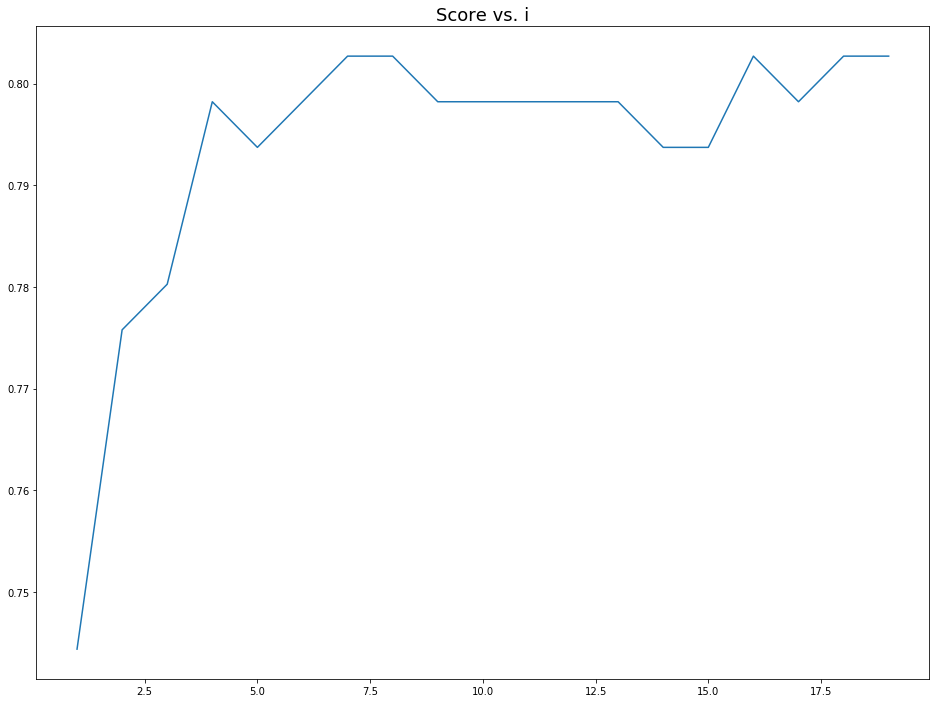

In [70]:
print(best_pred)
plt.figure(figsize=(16,12))
plt.plot(range(1,20),knn_scores)
plt.title('Score vs. i', fontsize = 18)

In [71]:
knn = KNeighborsClassifier(n_neighbors=13, weights='distance', metric = 'minkowski', p=2)

In [72]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='distance')

In [73]:
y_pred = knn.predict(X_test)

In [74]:
knn_accy = accuracy_score(y_test, y_pred)

In [75]:
knn_accy

0.7982062780269058

### Support Vector Machine

In [76]:
svc = SVC(probability=True)

In [77]:
svc.fit(X_train,y_train)

D:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [78]:
y_pred = svc.predict(X_test)

In [79]:
svc_accy = accuracy_score(y_test, y_pred)

In [80]:
svc_accy

0.8116591928251121

### Gaussian Naive Bayes

In [81]:
gaussian = GaussianNB()

In [82]:
gaussian.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [83]:
y_pred = gaussian.predict(X_test)

In [84]:
gaussian_accy = accuracy_score(y_test, y_pred)

In [85]:
gaussian_accy

0.7713004484304933

### Decision Tree Classifier

In [86]:
dectree = DecisionTreeClassifier()

In [87]:
dectree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
y_pred = dectree.predict(X_test)

In [89]:
dectree_accy = accuracy_score(y_test, y_pred)

In [90]:
dectree_accy

0.7892376681614349

### Bagging Classifier

In [91]:
bag = BaggingClassifier()

In [92]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [93]:
y_pred = bag.predict(X_test)

In [94]:
bag_accy = accuracy_score(y_test, y_pred)

In [95]:
bag_accy

0.7757847533632287

#### Random Forest Classifier

In [96]:
rfc = RandomForestClassifier()

In [97]:
rfc.fit(X_train,y_train)

D:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
y_pred = rfc.predict(X_test)

In [99]:
rfc_accy = accuracy_score(y_test, y_pred)

In [100]:
rfc_accy

0.7937219730941704

### Gradient Boosting Classifier

In [101]:
gradient = GradientBoostingClassifier()

In [102]:
gradient.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [103]:
y_pred = gradient.predict(X_test)

In [104]:
gradient_accy = accuracy_score(y_test, y_pred)

In [105]:
gradient_accy

0.820627802690583

### AdaBoost Classifier

In [106]:
adaboost = AdaBoostClassifier()

In [107]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [108]:
y_pred = adaboost.predict(X_test)

In [109]:
adaboost_accy = accuracy_score(y_pred, y_test)

In [110]:
adaboost_accy

0.7982062780269058

### Extra Trees Classifier

In [111]:
extra = ExtraTreesClassifier()

In [112]:
extra.fit(X_train,y_train)

D:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [113]:
y_pred = extra.predict(X_test)

In [114]:
extra_accy = accuracy_score(y_test, y_pred)

In [115]:
extra_accy

0.8116591928251121

### Gaussian Process Classifier

In [116]:
gaussianprocess = GaussianProcessClassifier()

In [117]:
gaussianprocess.fit(X_train,y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=None,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False)

In [118]:
y_pred = gaussianprocess.predict(X_test)

In [119]:
gaussianprocess_accy = accuracy_score(y_pred, y_test)

In [120]:
gaussianprocess_accy

0.8071748878923767

### Voting Classifier 

In [121]:
param = [('logreg',logreg),
         ('knn',knn),
         ('gaussian',gaussian),
        ('dectree',dectree),
        ('bag',bag),
        ('rfc',rfc),
        ('gradient',gradient),
        ('adaboost',adaboost),
        ('extra',extra),
        ('gaussianprocess',gaussianprocess),
        ('svc',svc)]

voting_classifier = VotingClassifier(estimators=param, voting = 'soft')

In [122]:
voting_classifier = voting_classifier.fit(X_train,y_train)

D:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [123]:
y_pred = voting_classifier.predict(X_test)

In [124]:
voting_accy = accuracy_score(y_test,y_pred)

In [125]:
voting_accy

0.8026905829596412

In [126]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','KNN','Logistic Regression',
             'Random Forest','Naive Bayes',
             'Decision Tree', ' Gradient Boosting Classifier',
             'Voting Classifier',' ExtraTrees Classifier', 'Bagging Classifier'],
    'Score': [svc_accy, knn_accy, logreg_accy, rfc_accy, gaussian_accy, dectree_accy,
             gradient_accy, voting_accy, extra_accy, bag_accy]
})

models.sort_values(by='Score',ascending=False)

,Model,Score
6,Gradient Boosting Classifier,0.820628
0,Support Vector Machines,0.811659
8,ExtraTrees Classifier,0.811659
2,Logistic Regression,0.802691
7,Voting Classifier,0.802691
1,KNN,0.798206
3,Random Forest,0.793722
5,Decision Tree,0.789238
9,Bagging Classifier,0.775785
4,Naive Bayes,0.771300


In [127]:
test_prediction = voting_classifier.predict(test)

In [128]:
passengerid = list(range(892,1310))

In [129]:
submission = pd.DataFrame({'PassengerId':passengerid,
                          "Survived": test_prediction})

In [131]:
submission.to_csv("titanic_sub.csv",index=False)